In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [68]:
df = pd.read_csv('iris.csv')
df = df.drop('Id', axis=1)  # Loại bỏ cột Id
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [69]:
print(df.index)

RangeIndex(start=0, stop=150, step=1)


In [70]:
cols_eda = df.columns[:-1]
print(cols_eda)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


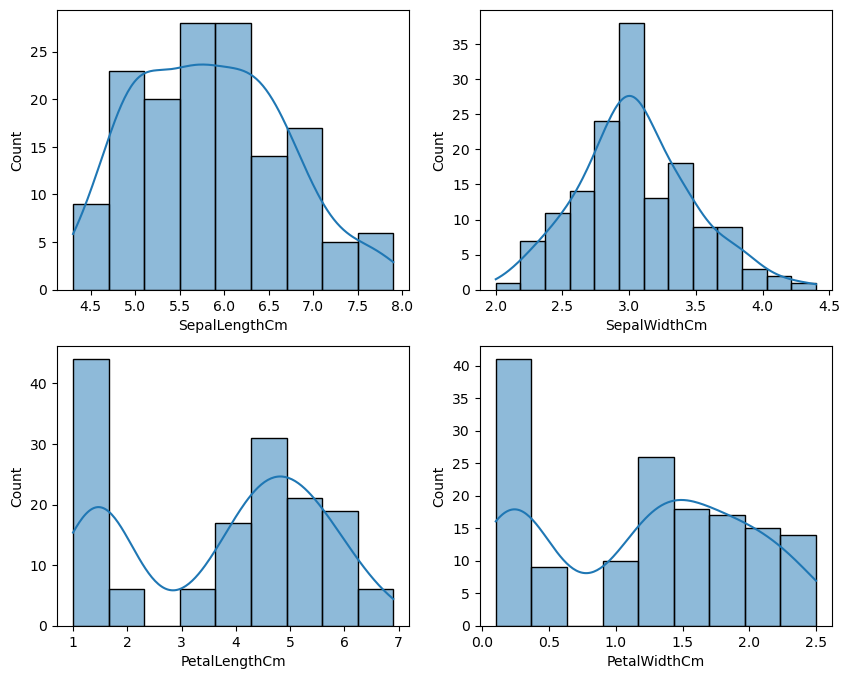

In [75]:
# 3.3 Phân tích phân phối các biến số input
# Vẽ biểu đồ histogram với đường cong mật độ kernel (KDE) để xem phân phối của từng đặc trưng:
fig = plt.figure(figsize=(10, 8))
for i in range(len(cols_eda)):
    col = cols_eda[i]
    sub = fig.add_subplot(2, 2, i+1)
    sns.histplot(data=df, x=col, kde=True)

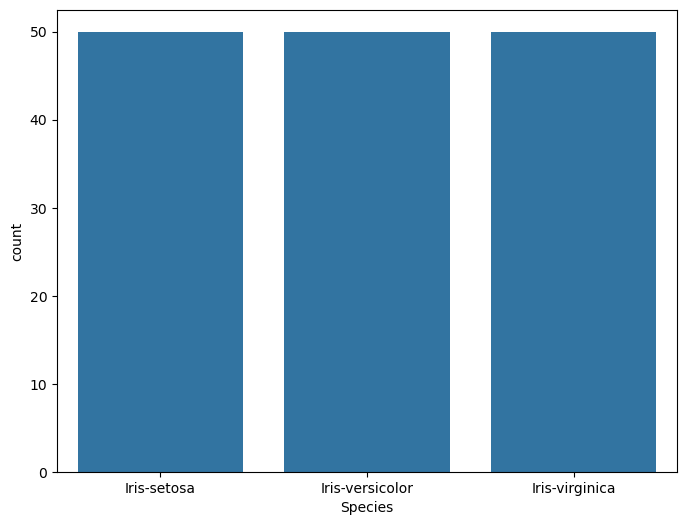

In [76]:
# 3.4 Đếm số lượng các biến định tính theo biến mục tiêu
# Với Iris, chỉ có species là biến định tính (mục tiêu). Vẽ biểu đồ đếm số lượng mẫu cho từng loài:
fig = plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Species')
plt.show()

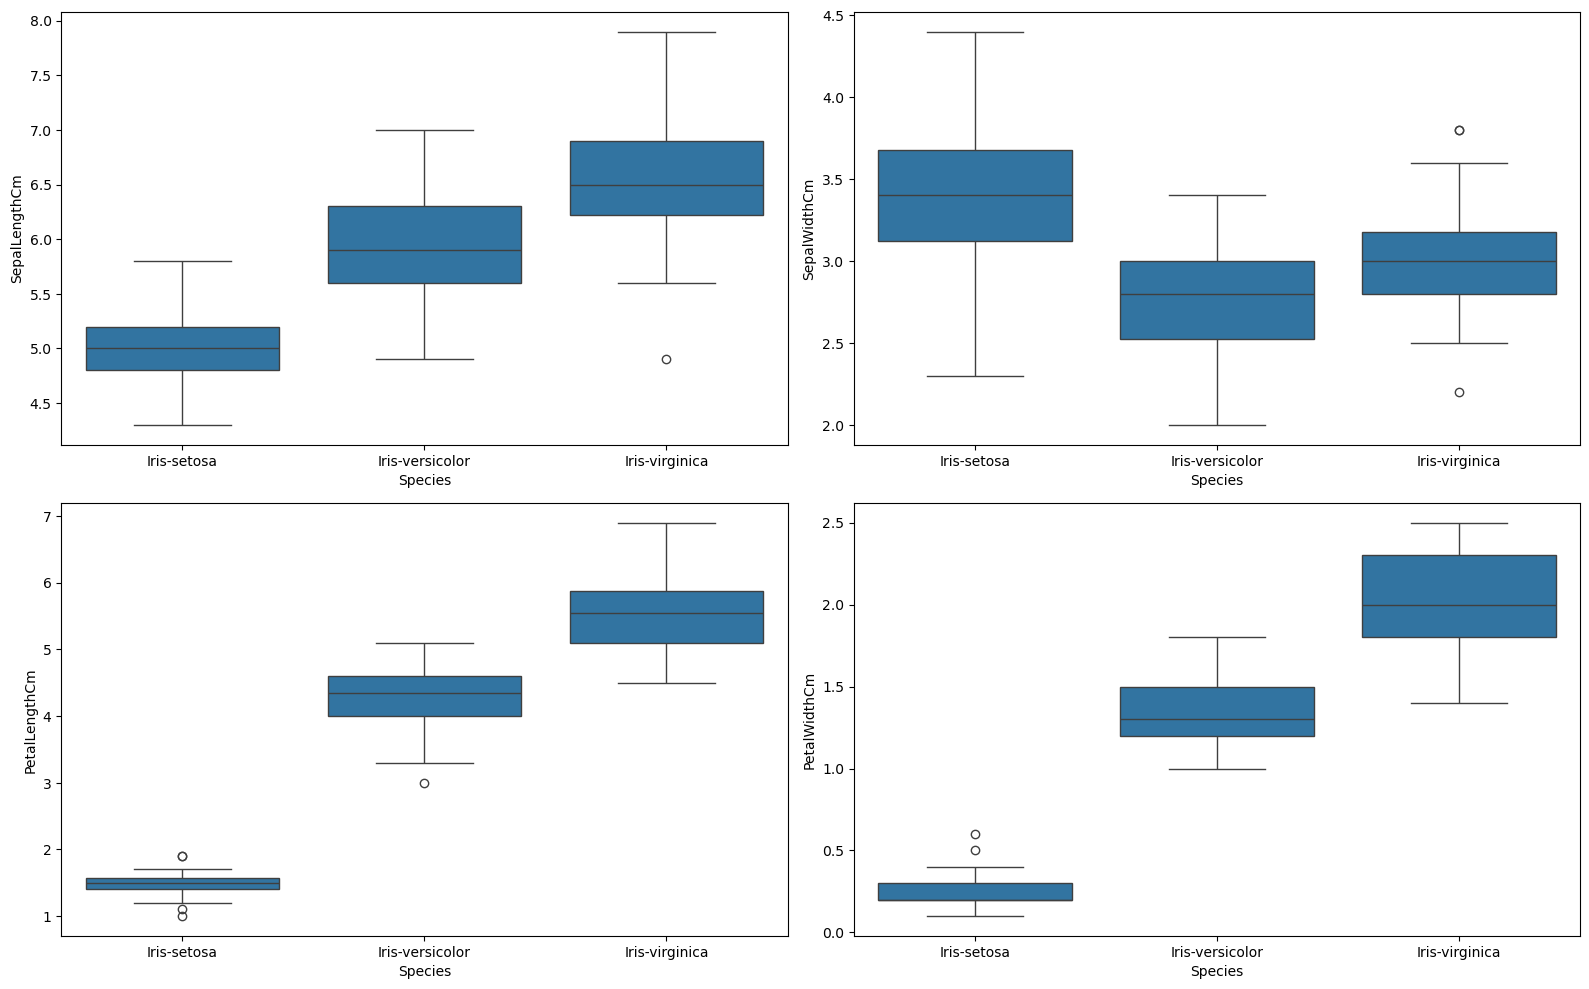

In [77]:
# 3.5 Phân tích biểu đồ Box-plot các biến định lượng theo biến mục tiêu
# Vẽ box plot để xem sự thay đổi của các đặc trưng định lượng theo từng loài:
fig = plt.figure(figsize=(16, 10))
for i in range(len(cols_eda)):
    col = cols_eda[i]
    sub = fig.add_subplot(2, 2, i+1)
    sns.boxplot(data=df, y=col, x='Species')
plt.tight_layout()
plt.show()

In [79]:
# 4. Xây dựng mô hình
# 4.1 Chuẩn bị dữ liệu
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['Species'])
X = df[cols_eda].values
y = df['species_encoded'].values

In [80]:
# 4.2 Phân chia tập dữ liệu thành train và test
# Chia dữ liệu với tỉ lệ 80:20 và random_state=42:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [81]:
# 4.3 Chuẩn hóa đặc trưng
# Chuẩn hóa dữ liệu bằng StandardScaler để đảm bảo các đặc trưng có cùng thang đo:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
# 4.4 Hiển thị 5 dòng cuối cùng của X_test và y_test
# Kiểm tra dữ liệu sau khi chia:

print("X_test (last 5 rows):")
print(X_test[-5:])
print("y_test (last 5 rows):")
print(y_test[-5:])

X_test (last 5 rows):
[[ 1.08589829 -0.12934896  0.84435239  1.48941263]
 [ 1.08589829 -1.25412249  1.18840091  0.82300877]
 [ 1.2077952   0.32056046  1.24574233  1.48941263]
 [-1.23014297 -0.12934896 -1.33462153 -1.17620281]
 [-1.23014297  0.09560575 -1.21993869 -1.30948358]]
y_test (last 5 rows):
[2 2 2 0 0]


In [84]:
# 4.5 Hiển thị danh sách index của tập train và test
# In chỉ số của các mẫu trong tập huấn luyện và kiểm tra:
print("Indices train:", indices_train)
print("Indices test:", indices_test)

Indices train: Index([ 22,  15,  65,  11,  42, 146,  51,  27,   4,  32,
       ...
        87,  74, 121, 149,  20,  71, 106,  14,  92, 102],
      dtype='int64', length=120)
Indices test: Index([ 73,  18, 118,  78,  76,  31,  64, 141,  68,  82, 110,  12,  36,   9,
        19,  56, 104,  69,  55, 132,  29, 127,  26, 128, 131, 145, 108, 143,
        45,  30],
      dtype='int64')


In [87]:
# 4.6 Huấn luyện mô hình
# Sử dụng KNN với k=5:
knnModel = KNeighborsClassifier(n_neighbors=5)
knnModel.fit(X_train, y_train)

KNeighborsClassifier()

In [88]:
# 4.7 Đánh giá mô hình
# Tính độ chính xác trên tập train và test:
print("Train accuracy:", knnModel.score(X_train, y_train))
print("Test accuracy:", knnModel.score(X_test, y_test))

Train accuracy: 0.9583333333333334
Test accuracy: 1.0


Number of candidates: 20
0/19: {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 2} - Train: 0.9666666666666667, Test: 1.0
1/19: {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 3} - Train: 0.9416666666666667, Test: 1.0
2/19: {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 4} - Train: 0.9583333333333334, Test: 1.0
3/19: {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 5} - Train: 0.9583333333333334, Test: 1.0
4/19: {'algorithm': 'ball_tree', 'metric': 'euclidean', 'n_neighbors': 6} - Train: 0.9583333333333334, Test: 1.0
5/19: {'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 2} - Train: 0.9666666666666667, Test: 1.0
6/19: {'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 3} - Train: 0.9416666666666667, Test: 1.0
7/19: {'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 4} - Train: 0.9583333333333334, Test: 1.0
8/19: {'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 

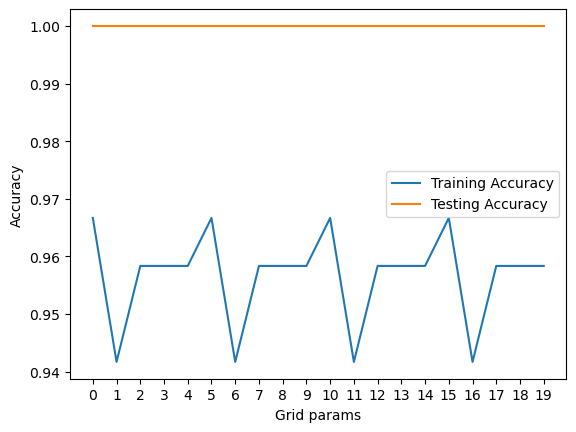

In [89]:
# 5. Hyperparameter Tuning với Grid Search
# 5.1 Sử dụng Grid Search với nhiều hyper-parameter
# Thử nghiệm các tổ hợp siêu tham số và tìm tổ hợp tốt nhất:
estimator = KNeighborsClassifier()
param_grid = {
    'n_neighbors': range(2, 7),
    'algorithm': ['ball_tree', 'kd_tree'],
    'metric': ['euclidean', 'minkowski']
}
param_candidates = ParameterGrid(param_grid)
print(f'Number of candidates: {len(param_candidates)}')
results = []
for i, params in enumerate(param_candidates):
    model = estimator.set_params(**params)
    model.fit(X_train, y_train)
    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    results.append([params, score_train, score_test])
    print(f'{i}/{len(param_candidates)-1}: {params} - Train: {score_train}, Test: {score_test}')

print(f'Max score on train: {max(results, key=lambda x: x[1])}')
print(f'Max score on test: {max(results, key=lambda x: x[2])}')

list_index = range(len(results))
list_score_train = [x[1] for x in results]
list_score_test = [x[2] for x in results]
plt.plot(list_index, list_score_train, label='Training Accuracy')
plt.plot(list_index, list_score_test, label='Testing Accuracy')
plt.legend()
plt.xlabel('Grid params')
plt.xticks(range(len(results)), range(len(results)))
plt.ylabel('Accuracy')
plt.show()

K = 1, Train: 1.0, Test: 1.0
K = 2, Train: 0.9833333333333333, Test: 1.0
K = 3, Train: 0.9916666666666667, Test: 1.0
K = 4, Train: 0.9916666666666667, Test: 1.0
K = 5, Train: 0.9916666666666667, Test: 1.0
K = 6, Train: 0.9916666666666667, Test: 1.0
K = 7, Train: 0.9916666666666667, Test: 1.0
K = 8, Train: 0.9916666666666667, Test: 1.0
K = 9, Train: 0.9916666666666667, Test: 1.0
K = 10, Train: 0.9916666666666667, Test: 1.0
K = 11, Train: 0.9916666666666667, Test: 1.0
K = 12, Train: 0.9916666666666667, Test: 1.0
K = 13, Train: 0.9916666666666667, Test: 1.0
K = 14, Train: 0.9916666666666667, Test: 1.0
K = 15, Train: 0.9916666666666667, Test: 1.0
K = 16, Train: 0.9916666666666667, Test: 1.0
K = 17, Train: 0.9916666666666667, Test: 1.0
K = 18, Train: 0.9916666666666667, Test: 1.0
K = 19, Train: 0.9916666666666667, Test: 1.0
K = 20, Train: 0.9916666666666667, Test: 1.0
K = 21, Train: 0.9916666666666667, Test: 1.0
K = 22, Train: 0.9916666666666667, Test: 1.0
K = 23, Train: 0.9916666666666667,

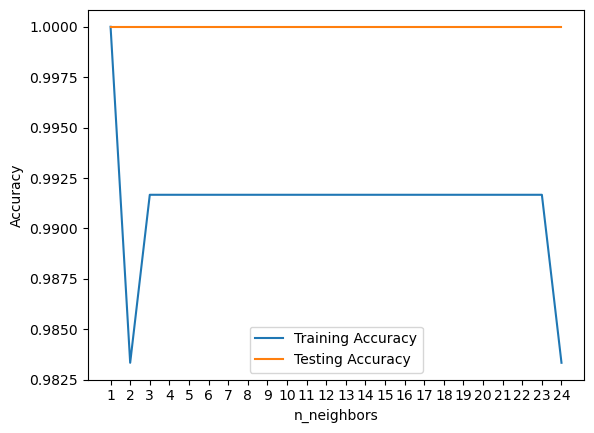

Optimal k: 1


In [56]:
# 5.2 Tìm giá trị K tốt nhất
# Kiểm tra các giá trị k từ 1 đến 24 để chọn k tối ưu:
neighbors = np.arange(1, 25)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    print(f'K = {k}, Train: {train_accuracy[i]}, Test: {test_accuracy[i]}')

plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 25))
plt.show()

optimal_k = neighbors[np.argmax(test_accuracy)]
print(f'Optimal k: {optimal_k}')

In [90]:
# 6. Xây dựng lại mô hình với K tốt nhất
# Sử dụng k tối ưu để xây dựng lại mô hình:
knnModel = KNeighborsClassifier(n_neighbors=optimal_k)
knnModel.fit(X_train, y_train)
print("Train accuracy:", knnModel.score(X_train, y_train))
print("Test accuracy:", knnModel.score(X_test, y_test))

Train accuracy: 1.0
Test accuracy: 1.0


In [91]:
# 7. Phân tích hàng xóm gần nhất
# 7.1 In danh sách index và khoảng cách của các hàng xóm gần nhất trong tập test
# Xem các hàng xóm gần nhất cho các mẫu trong tập test:
distances, indices = knnModel.kneighbors(X_test)
print(indices)
print(distances)

[[ 79]
 [ 48]
 [ 24]
 [ 79]
 [ 92]
 [114]
 [ 95]
 [ 85]
 [110]
 [118]
 [ 83]
 [104]
 [114]
 [ 55]
 [ 84]
 [  6]
 [ 76]
 [ 53]
 [108]
 [ 50]
 [ 38]
 [ 42]
 [ 57]
 [ 50]
 [ 37]
 [ 76]
 [ 50]
 [ 61]
 [104]
 [ 55]]
[[0.34879747]
 [0.44955321]
 [0.61273527]
 [0.2139504 ]
 [0.37544102]
 [0.29018479]
 [0.364425  ]
 [0.31724975]
 [0.37390717]
 [0.23214792]
 [0.4334569 ]
 [0.18061733]
 [0.34361619]
 [0.        ]
 [0.14509239]
 [0.31045031]
 [0.42554179]
 [0.2622051 ]
 [0.22936568]
 [0.48997025]
 [0.1673649 ]
 [0.13471041]
 [0.2726593 ]
 [0.38891133]
 [0.40010352]
 [0.33986212]
 [0.66038845]
 [0.1673649 ]
 [0.18061733]
 [0.18950108]]


In [92]:
# 7.2 Xem hàng xóm gần nhất của mẫu đầu tiên trong tập test
# Kiểm tra chi tiết mẫu đầu tiên:
print("Indices for first test sample:", indices[0])
print("Distances for first test sample:", distances[0])

Indices for first test sample: [79]
Distances for first test sample: [0.34879747]


In [95]:
# 7.3 Dự đoán hàng xóm gần nhất cho một mẫu mới
# Thử với mẫu mới [5.0, 3.5, 1.5, 0.2]:
new_sample = [5.0, 3.5, 1.4, 0.2]
new_sample_scaled = scaler.transform([new_sample])
distances, indices = knnModel.kneighbors(new_sample_scaled)
print("Indices for new sample:", indices)
print("Distances for new sample:", distances)

Indices for new sample: [[23]]
Distances for new sample: [[0.12189691]]


In [96]:
# 8. Phân tích dự đoán
# 8.1 Xem danh sách các lớp của biến mục tiêu
# Kiểm tra các nhãn mà mô hình có thể dự đoán:
print("Classes:", knnModel.classes_)

Classes: [0 1 2]


In [97]:
# 8.2 Xem xác suất dự đoán cho tập test
# Lấy xác suất dự đoán cho từng lớp:
y_test_score = knnModel.predict_proba(X_test)
print("Predicted probabilities for test set:\n", y_test_score)

Predicted probabilities for test set:
 [[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [98]:
# 8.3 Xác suất dự đoán cho mẫu thứ 3
# Kiểm tra mẫu có index=2 trong tập test:
print("Test sample 3:", X_test[2])
print("Predicted probabilities for sample 3:", y_test_score[2])
max_prob = np.max(y_test_score[2])
max_label = np.argmax(y_test_score[2])
print(f"Highest probability label: {max_label} with probability: {max_prob}")

Test sample 3: [ 2.30486738 -1.02916778  1.81915651  1.48941263]
Predicted probabilities for sample 3: [0. 0. 1.]
Highest probability label: 2 with probability: 1.0


In [99]:
# 8.4 Dự đoán nhãn cho tập test
# Lấy nhãn dự đoán và kiểm tra mẫu thứ 5:
y_test_pred = knnModel.predict(X_test)
print("Predicted labels:\n", y_test_pred)
print("Prediction for sample 5:", y_test_pred[4])

Predicted labels:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Prediction for sample 5: 1


In [100]:
# 9. Đánh giá mô hình
# 9.1 Ma trận nhầm lẫn
# Tính ma trận nhầm lẫn cho bài toán đa lớp:
cfmx = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", cfmx)

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [102]:
# 9.2 Báo cáo phân loại
# Đánh giá chi tiết với precision, recall, F1-score:
print(classification_report(y_test, y_test_pred, target_names=le.classes_))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



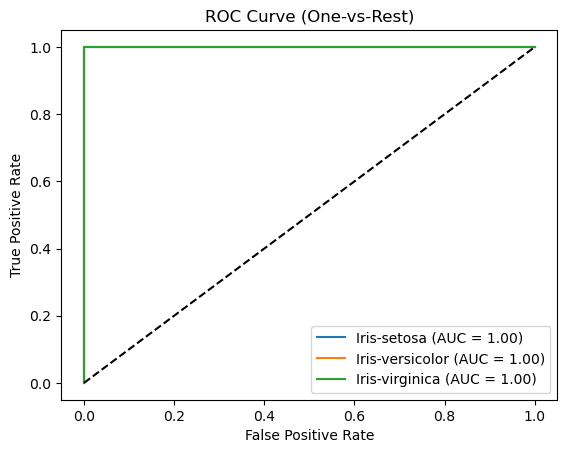

In [105]:
# 10. Đồ thị AUC-ROC
# AUC-ROC thường áp dụng cho bài toán nhị phân. Với đa lớp, tính ROC cho từng lớp (One-vs-Rest):
y_score = knnModel.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f'{le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend(loc='best')
plt.show()

In [106]:
# Accuracy
print("Accuracy:", knnModel.score(X_test, y_test))

# Confusion Matrix
print("Confusion Matrix:\n", cfmx)

# Classification Report
print(classification_report(y_test, y_test_pred))

# AUC-ROC cho từng lớp
for i in range(3):
    print(f"AUC for {le.classes_[i]}: {roc_auc[i]:.2f}")

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

AUC for Iris-setosa: 1.00
AUC for Iris-versicolor: 1.00
AUC for Iris-virginica: 1.00
